<a href="https://colab.research.google.com/github/AnantaApril/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/April_Aeschbacher_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [4]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-15 01:02:02--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.28.230
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.28.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  43.7MB/s    in 5.0s    

2020-05-15 01:02:08 (39.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [5]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [6]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [7]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
# Checking for needed data in aisles - nothing there that I need
new_aisles = pd.read_csv('aisles.csv')
new_aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
# also nothing here that I need
new_departments = pd.read_csv('departments.csv')
new_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
# I could use add_to_cart_order and reordered to find how many times those items were ordered, checking for more 
new_order_products_prior = pd.read_csv('order_products__prior.csv')
new_order_products_prior.shape

(32434489, 4)

In [12]:
new_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
new_order_products_train = pd.read_csv('order_products__train.csv')
new_order_products_train.shape


(1384617, 4)

In [14]:
#  Concatenate prior and train
new_order_products = pd.concat([new_order_products_prior, new_order_products_train], axis = 0)
new_order_products.shape
new_order_products.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
# Make new table with just the info we want
ord_prod = new_order_products[['product_id','add_to_cart_order']]

ord_prod.sample(5)


,product_id,add_to_cart_order
17080872,16659,16
15891741,3285,13
14587762,8174,17
25266669,46979,1
24998922,29388,6


In [16]:
new_orders = pd.read_csv('orders.csv')
new_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [17]:
new_products = pd.read_csv('products.csv')
new_products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
# take out the ones we want for product name and a common variable product id
prod_short = new_products[['product_id', 'product_name']]
prod_short.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [19]:
# Now put two tables we have shortened together in one table
prod_orders = pd.merge(prod_short, ord_prod, on = 'product_id', how = 'inner' )
prod_orders.head()

,product_id,product_name,add_to_cart_order
0,1,Chocolate Sandwich Cookies,7
1,1,Chocolate Sandwich Cookies,3
2,1,Chocolate Sandwich Cookies,4
3,1,Chocolate Sandwich Cookies,2
4,1,Chocolate Sandwich Cookies,30


In [20]:
# Now add the items we want from that table(the top ten items)
prod_orders['product_name'].value_counts()


Banana                                         491291
Bag of Organic Bananas                         394930
Organic Strawberries                           275577
Organic Baby Spinach                           251705
Organic Hass Avocado                           220877
                                                ...  
Strawberry Energy Gel                               1
Greek Blended Cherry Fat Free Yogurt                1
Rosa Mosqueta Rose Hip Seed Oil                     1
Sugar Leaf  Stevia and Raw Cane Sugar               1
All Natural Stevia Liquid Extract Sweetener         1
Name: product_name, Length: 49685, dtype: int64

In [0]:
product_names = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 
                 'Organic Avocado', 'Large Lemon','Strawberries', 'Limes', 'Organic Whole Milk']
          

In [22]:
conditions = prod_orders['product_name'].isin(product_names)
print(prod_orders.shape)
prod_orders = prod_orders[conditions]
print(prod_orders.shape)
prod_orders

(33819106, 3)
(2418314, 3)


,product_id,product_name,add_to_cart_order
7874745,13176,Bag of Organic Bananas,1
7874746,13176,Bag of Organic Bananas,1
7874747,13176,Bag of Organic Bananas,3
7874748,13176,Bag of Organic Bananas,3
7874749,13176,Bag of Organic Bananas,3
...,...,...,...
32598474,47766,Organic Avocado,1
32598475,47766,Organic Avocado,4
32598476,47766,Organic Avocado,20
32598477,47766,Organic Avocado,9


In [23]:
prod_orders['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [24]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [25]:
# First transpose it
table2.T

,treatmenta,treatmentb
John Smith,NaN,2.0
Jane Doe,16.0,11.0
Mary Johnson,3.0,1.0


In [26]:
# Now use melt and give it new column names
tidy2 = table2.T.reset_index().melt(id_vars = 'index').rename(columns = {
    'index' : 'Name',
    'variable' : 'Trt',
    'value' : 'Result'
})
tidy2

,Name,Trt,Result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [27]:
# Clean up column names etc.
tidy2['Trt'] = tidy2['Trt'].str.replace('treatment', '')
tidy2.set_index('Name')
tidy2

,Name,Trt,Result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [28]:
# tidy -> table2
wide_format = tidy2.pivot_table(index = 'Name', columns = 'Trt', values = 'Result')
wide_format

Trt,a,b
Name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [0]:
import seaborn as sns

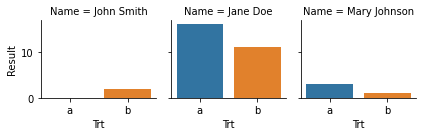

In [30]:
sns.catplot(x = 'Trt', y= 'Result', col= 'Name',
            kind = 'bar', data = tidy2, height = 2);

In [0]:
flights = sns.load_dataset('flights')

In [32]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [33]:
# Flights Pivot Table
flights.pivot_table(index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


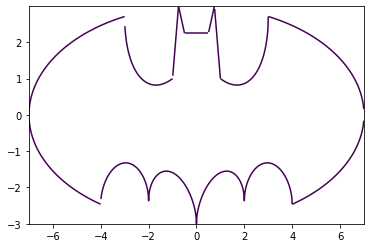

In [0]:
from __future__ import division  # this is important, otherwise 1/2 will be 0
import matplotlib.pyplot
from numpy import arange
from numpy import meshgrid
from numpy import sqrt
from numpy import real
delta = 0.01
xrange = arange(-7.0, 7.0, delta)
yrange = arange(-3.0, 3.0, delta)
x, y = meshgrid(xrange,yrange)
F1 = (((x/7) ** 2) * sqrt(abs(abs(x) - 3)/(abs(x) - 3)) + ((y / 3) ** 2) * sqrt(abs(y + (3 * sqrt(33)) / 7)/(y + (3 * sqrt(33)) / 7)) - 1)
F2 = (abs(x/2) - ((3 * sqrt(33) - 7)/112) * x**2 - 3 + sqrt(1 - (abs(abs(x) - 2) - 1) ** 2 ) - y)
F3 = (9 * sqrt(abs((abs(x) - 1) * (abs(x) - 3/4))/((1 - abs(x)) * (abs(x) - 3/4))) - 8 * abs(x) - y)
F4 = (3 * abs(x) + 0.75 * sqrt(abs((abs(x) - 3/4) * (abs(x) - 1/2))/((3/4 - abs(x)) * (abs(x) - 1/2))) - y)
F5 = ((9/4) * sqrt(abs((x - 1/2) * (x + 1/2))/((1/2 - x) * (1/2 + x))) - y)
F6 = ((6 * sqrt(10)) / 7 + (3/2 - abs(x)/2) * sqrt(abs(abs(x) - 1)/(abs(x) - 1)) - ((6 * sqrt(10))/ 14) * sqrt(4 - (abs(x) - 1) ** 2 ) - y)
for f in [F1,F2,F3,F4,F5,F6]:
    matplotlib.pyplot.contour(x, y, f, [0])
matplotlib.pyplot.show()

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####